In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

import pandas as pd
import matplotlib.pyplot as plt


# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="2944a580-6c5f-4258-8c86-b9c5de957998",
    resource_group_name="calebebraga08-rg",
    workspace_name="tcc-experiments",
)

In [2]:
TRAIN_DATA_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/train_data/"

TRAIN_DATAS = [
    "vrex_1999_2000_2001_2002_2003_.csv",
    "vrex_2004_2005_2006_2007_2008_.csv",
    "vrex_2009_2010_2011_2012_2013_.csv",
    "vrex_2014_2015_2016_2017_2018_.csv",
    "vrex_2019_2020_2021_.csv"
]

TEST_DATAS = [
    "vrex_2004.csv",
    "vrex_2009.csv",
    "vrex_2014.csv",
    "vrex_2019.csv"
]

v1 = "original"

In [3]:
def _remove_columns(df : pd.DataFrame) -> pd.DataFrame:
    return df.drop(columns=[  'lbl_exploits_delta_days',	
                        'lbl_exploits_weaponized_type_ENUM_absent',
                        'lbl_exploits_weaponized_type_ENUM_other',	
                        'lbl_exploits_weaponized_type_ENUM_auxiliary',
                        'lbl_exploits_weaponized_type_ENUM_exploit',
                        'lbl_exploits_weaponized_count',
                        'lbl_exploits_verified',
                        'idx',
                        'cve',
                        'lbl_exploits_has'
    ])

vrex_1999_2000_2001_2002_2003_.csv
shape original:  (8317, 885)
shape without null values:  (8317, 586)
removed columns:  299


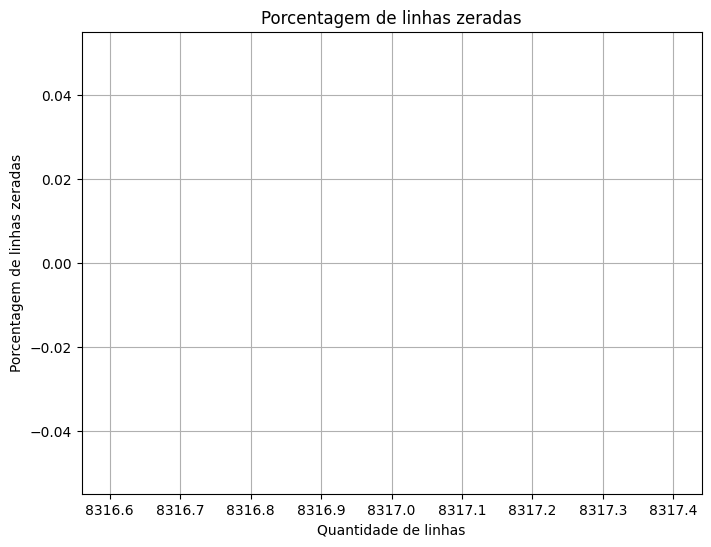

vrex_2004_2005_2006_2007_2008_.csv
shape original:  (28335, 885)
shape without null values:  (28335, 724)
removed columns:  161


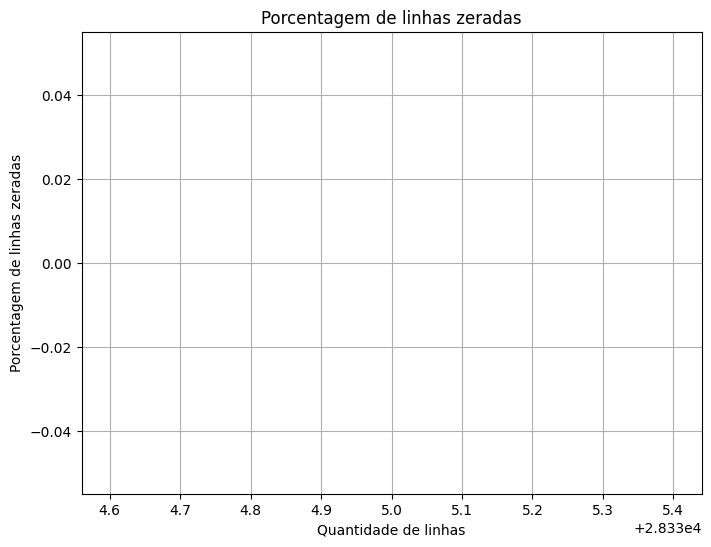

vrex_2009_2010_2011_2012_2013_.csv
shape original:  (27445, 885)
shape without null values:  (27445, 747)
removed columns:  138


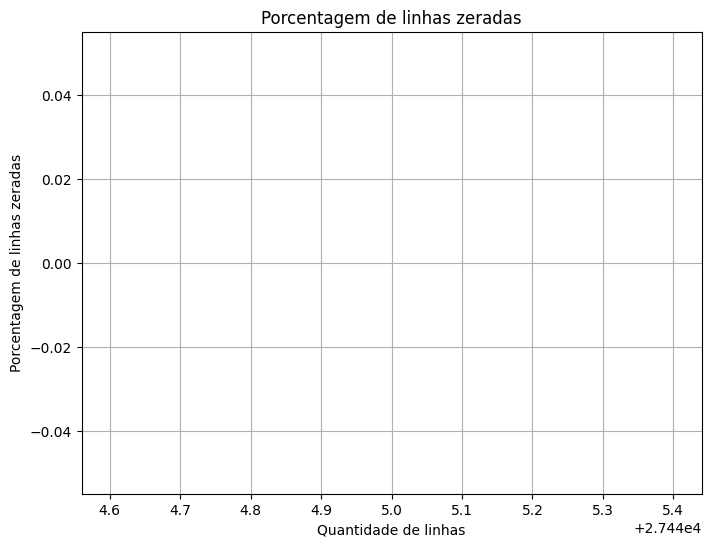

vrex_2014_2015_2016_2017_2018_.csv
shape original:  (60660, 885)
shape without null values:  (60660, 774)
removed columns:  111


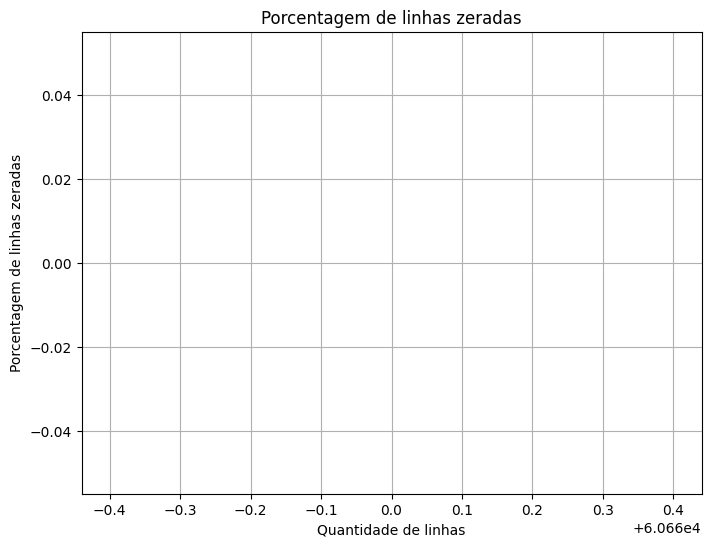

vrex_2019_2020_2021_.csv
shape original:  (32261, 885)
shape without null values:  (32261, 722)
removed columns:  163


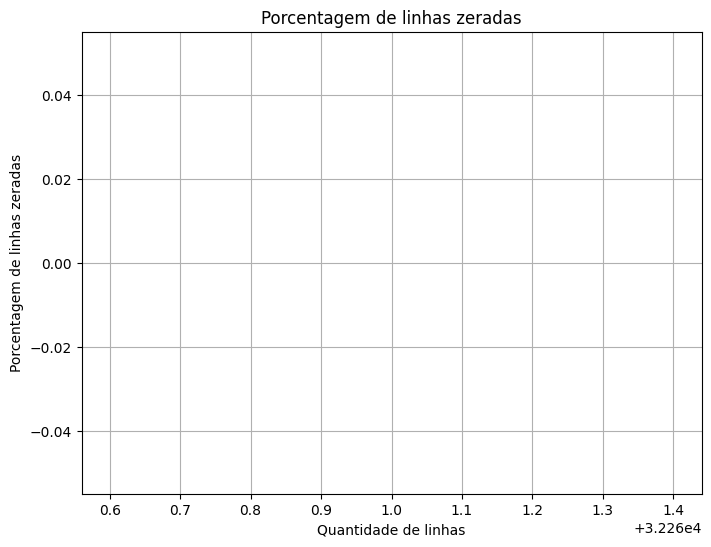

In [4]:
join_removed_columns = []

for df_name in TRAIN_DATAS:
    df_vrex = pd.read_csv(f"{TRAIN_DATA_PATH}{df_name}")
    print(df_name)
    
    print("shape original: ", df_vrex.shape)

    all_columns = df_vrex.columns.tolist()
    
    #remove columns where all values are null
    df_vrex = df_vrex.loc[:, (df_vrex != 0).any(axis=0)]
    
    removed_columns = [column for column in all_columns if column not in df_vrex.columns]
    print("shape without null values: ", df_vrex.shape)
    print("removed columns: ", len(removed_columns) )
    join_removed_columns.extend(removed_columns)

    #plot graph with null rows
    quantidade_linhas = len(df_vrex)

    # Calcular a porcentagem de linhas zeradas
    porcentagem_linhas_zeradas = (df_vrex == 0).all(axis=1).mean() * 100

    quantidade_linhas

    po

    # Plotar o gráfico
    plt.figure(figsize=(8, 6))
    plt.bar(quantidade_linhas, porcentagem_linhas_zeradas, color='skyblue')
    plt.title('Porcentagem de linhas zeradas')
    plt.xlabel('Quantidade de linhas')
    plt.ylabel('Porcentagem de linhas zeradas')
    plt.grid(True)
    plt.show()





In [5]:
join_removed_columns = list(set(join_removed_columns))
print("join removed columns:", join_removed_columns, "len: ", len(join_removed_columns))

join removed columns: ['vendor_ENUM_phoenixcontact', 'reference_type_ENUM_nai', 'vendor_ENUM_wso2', 'vendor_ENUM_sgi', 'description_ENUM_person', 'vendor_ENUM_saltstack', 'description_ENUM_infrastructure', 'reference_type_ENUM_netbsd', 'description_ENUM_caf', 'vendor_ENUM_mediawiki', 'description_ENUM_leveraging', 'vendor_ENUM_moxa', 'vendor_ENUM_amd', 'vendor_ENUM_mitel', 'vendor_ENUM_quest', 'vendor_ENUM_mybulletinboard', 'vendor_ENUM_trustix', 'vendor_ENUM_manageengine', 'vendor_ENUM_easydigitaldownloads', 'description_ENUM_networking', 'vendor_ENUM_sybase', 'vendor_ENUM_wolfssl', 'vendor_ENUM_vbulletin', 'description_ENUM_app', 'reference_type_ENUM_sun', 'description_ENUM_joomla', 'vendor_ENUM_rim', 'vendor_ENUM_tor', 'vendor_ENUM_x', 'vendor_ENUM_uclouvain', 'vendor_ENUM_haxx', 'vendor_ENUM_libsdl', 'reference_type_ENUM_mskb', 'vendor_ENUM_phorum', 'vendor_ENUM_tcpdump', 'vendor_ENUM_huawei', 'description_ENUM_disclosure', 'vendor_ENUM_elastic', 'vendor_ENUM_jelsoft', 'vendor_ENUM

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
df = pd.read_csv('seu_arquivo.csv')

# Calcular a quantidade de linhas
quantidade_linhas = len(df)

# Calcular a porcentagem de linhas zeradas
porcentagem_linhas_zeradas = (df == 0).all(axis=1).mean() * 100

# Plotar o gráfico
plt.figure(figsize=(8, 6))
plt.bar(quantidade_linhas, porcentagem_linhas_zeradas, color='skyblue')
plt.title('Porcentagem de linhas zeradas')
plt.xlabel('Quantidade de linhas')
plt.ylabel('Porcentagem de linhas zeradas')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'seu_arquivo.csv'